## qsoabsfind example notebook

Below I show a few examples to run `qsoabsfind` explore its output.

In [1]:
# imports
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

## Running qsoabsfind as `bash` script

### details of input file

In [2]:
# exploring ..data/qso_test.fits file

hdul = fits.open(f'../data/qso_test.fits')
# If you want to see headers of other HDUs, you can do so as follows
for i, hdu in enumerate(hdul):
    print(f"Header of HDU {i}:")
    print(hdu.header)
    print("\n")
    
hdul.close()


Header of HDU 0:
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  SURVEY  = 'SDSS    '                                                            TARGET  = 'QSO     '                                                            DR      = '16      '                                                            AUTHOR  = 'Abhijeet Anand'                                                      END                                                                                                                                                                                                                                                                                                                                                    

I have already run `qsoabsfind` on `../data/qso_test.fits` and saved the results as `../data/MgII_cat.fits`. In case you want to run, please do it by changing the `--output`

### Example run

In [3]:
# ! export absorber='MgII'
# !qsoabsfind  --input-fits-file ../data/qso_test.fits \
#              --output ../data/${absorber}_cat.fits\
#              --absorber ${absorber} \
#              --n-tasks 4 --ncpus 4 \
#              --headers AUTHOR=ABHIJEET SURVEY=SDSS 

### Exploring output

In [4]:
hdul_abs = fits.open(f'../data/MgII_cat.fits')
# If you want to see headers of other HDUs, you can do so as follows
for i, hdul_abs in enumerate(hdul_abs):
    print(f"Header of HDU {i}:")
    print(hdul_abs.header)
    print("\n")
    

Header of HDU 0:
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  AUTHOR  = 'ABHIJEET'                                                            SURVEY  = 'SDSS    '                                                            ABSORBER= 'MgII    '           / Absorber name                                  KERWIDTH= '[3, 4, 5, 6, 7, 8]' / Kernel width in pixels (ker_width_pixels)      COEFFSIG=                  2.5 / Coefficient for sigma threshold (coeff_sigma)  MULTRE  =                    1 / Multiplicative factor for residuals (mult_resi)D_PIX   =                  0.6 / tolerance for line separation (in Ang) (d_pix) PM_PIXEL=                  200 / Pixel parameter for local noise estimation (pm_SN_LINE1=              

Text(0.5, 0, 'MgII redshift')

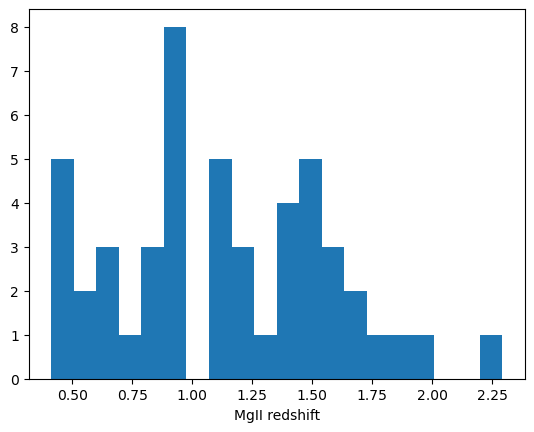

In [5]:
abs_tab = Table.read(f'../data/MgII_cat.fits', hdu=1)
zabs = abs_tab["Z_ABS"].data
plt.hist(zabs, bins=20)
plt.xlabel('MgII redshift')

Text(0.5, 0, '$EW_{\\rm MgII}\\, [\\AA]$')

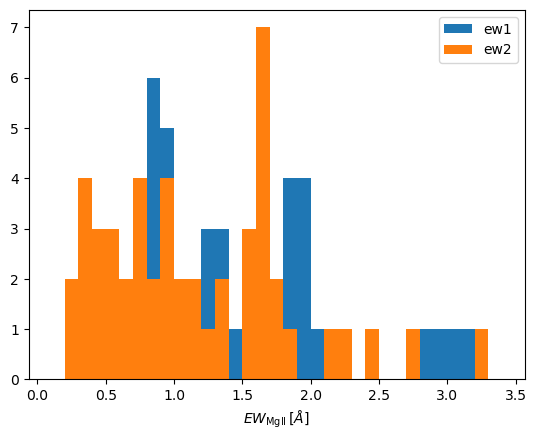

In [6]:
ew1 = abs_tab["MGII_2796_EW"].data
ew2 = abs_tab["MGII_2803_EW"].data
bins = np.arange(0.1, 3.5, 0.1)
plt.hist(ew1, bins=bins, label='ew1')
plt.hist(ew2, bins=bins, label = 'ew2')
plt.legend()
plt.xlabel(r'$EW_{\rm MgII}\, [\AA]$')

### Plotting spectra

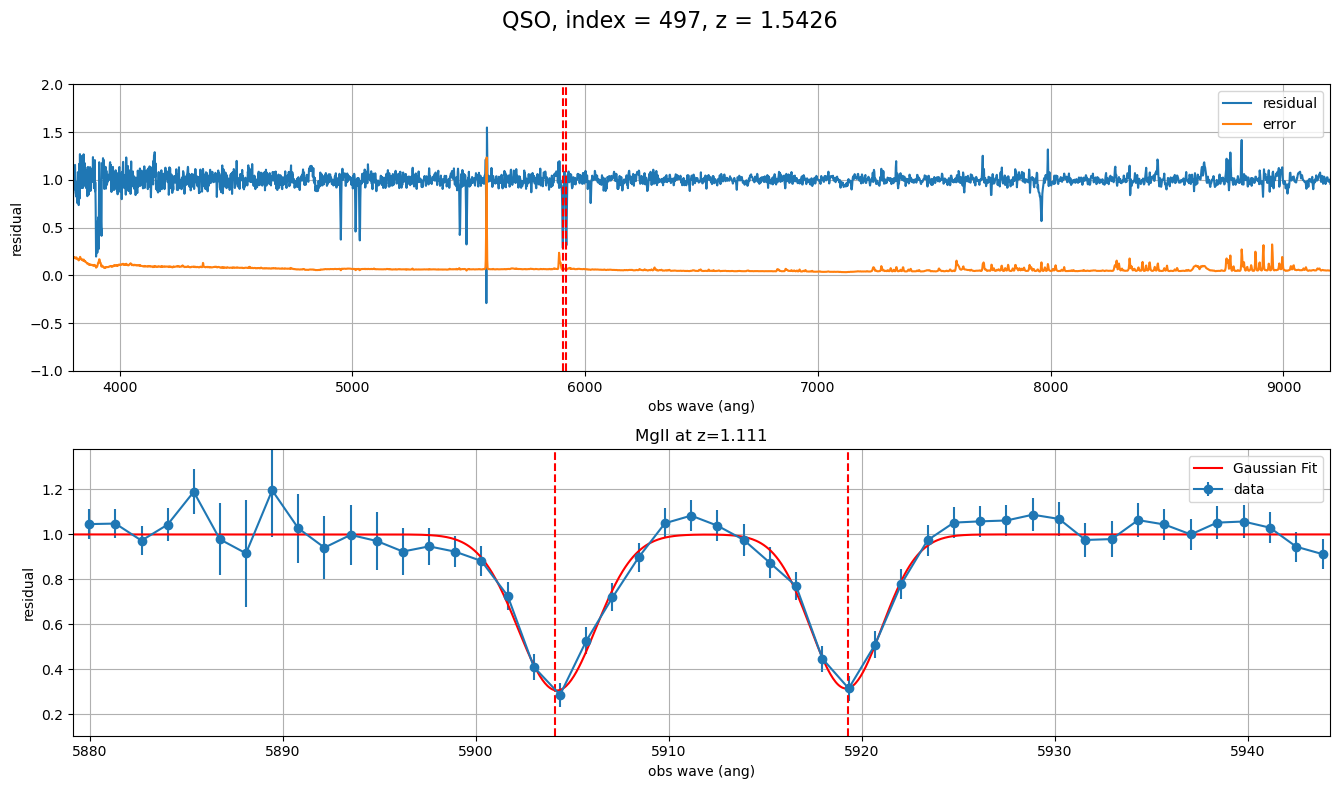

In [7]:
from qsoabsfind.utils import plot_absorber
from qsoabsfind.spec import QSOSpecRead

# select a random spectra from MgII_cat.fits

index = np.random.choice(abs_tab["INDEX_SPEC"].data)
spectra = QSOSpecRead(f'../data/qso_test.fits', index)

# select corresponding zabs table
zabs = abs_tab[abs_tab["INDEX_SPEC"].data==index]
plot_absorber(spectra, 'MgII', zabs, show_error=True, xlabel='obs wave (ang)', \
              ylabel='residual', title=f'QSO, index = {index}, z = {spectra.metadata["Z_QSO"]:.4f}', plot_filename=None)

### Using qsoabsfind internally as module

In [8]:
# if want to run qsoabsfind on one spectrum
from qsoabsfind.absfinder import read_single_spectrum_and_find_absorber
from qsoabsfind.constants import search_parameters
help(read_single_spectrum_and_find_absorber)

Help on function read_single_spectrum_and_find_absorber in module qsoabsfind.absfinder:

read_single_spectrum_and_find_absorber(fits_file, spec_index, absorber, **kwargs)
    This function retrieves a single QSO spectrum from a FITS file, processes the data to remove NaNs,
    and prepares the spectrum for absorber search within specified wavelength regions
    and runs the convolution based adaptive S/N method to detect absorbers in the spectrum.
    
    Args:
        fits_file (str): Path to the FITS file containing normalized QSO spectra.
                         The file must include extensions for FLUX, ERROR, WAVELENGTH
                         and METADATA which must contain keyword Z_QSO.
        spec_index (int): Index of the quasar spectrum to retrieve from the FITS file.
        absorber (str): Name of the absorber to search for (e.g., 'MgII', 'CIV').
        kwargs (dict): search parameters as described in qsoabsfind.constants()
    
    Returns:
        tuple: Contains li

In [10]:
read_single_spectrum_and_find_absorber(f'../data/qso_test.fits', 497, 'MgII', **search_parameters["MgII"])


Time taken to finish absorber detection for index = 497 is:  3.06 seconds


/Users/abhijeet/software/myprojects/QSO-ABS/qsoabsfind/qsoabsfind/utils.py:338: RuntimeWarning: invalid value encountered in double_scalars
  v1_sig = sigma1 / c1 * speed_of_light
/Users/abhijeet/software/myprojects/QSO-ABS/qsoabsfind/qsoabsfind/utils.py:339: RuntimeWarning: invalid value encountered in double_scalars
  v2_sig = sigma2 / c2 * speed_of_light


([497],
 [1.111364487818865],
 [[0.694172589123941,
   2796.3854319541897,
   0.9494138919416779,
   0.6855870268551952,
   2803.484477196296,
   0.8739519170646013]],
 [[0.04273734800278068,
   0.07270199943941978,
   0.07404445449052269,
   0.04610258450696472,
   0.07235079407025632,
   0.07473600580317734]],
 [1.6520111560821533],
 [1.5018967390060425],
 [3.1539077758789062],
 [0.2770255506038666],
 [0.2760109007358551],
 [0.39105650782585144],
 [3.867242412525229e-05],
 [13.30461184933092],
 [11.757744847687922])

Text(0.5, 0, 'CIV redshift')

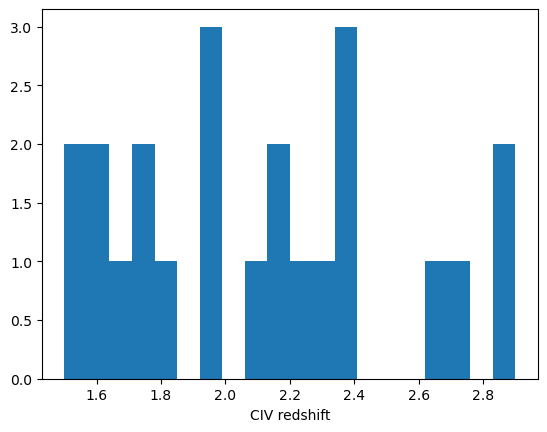

In [1]:
abs_tab = Table.read(f'../data/CIV_cat.fits', hdu=1)
zabs = abs_tab["Z_ABS"].data
plt.hist(zabs, bins=20)
plt.xlabel('CIV redshift')

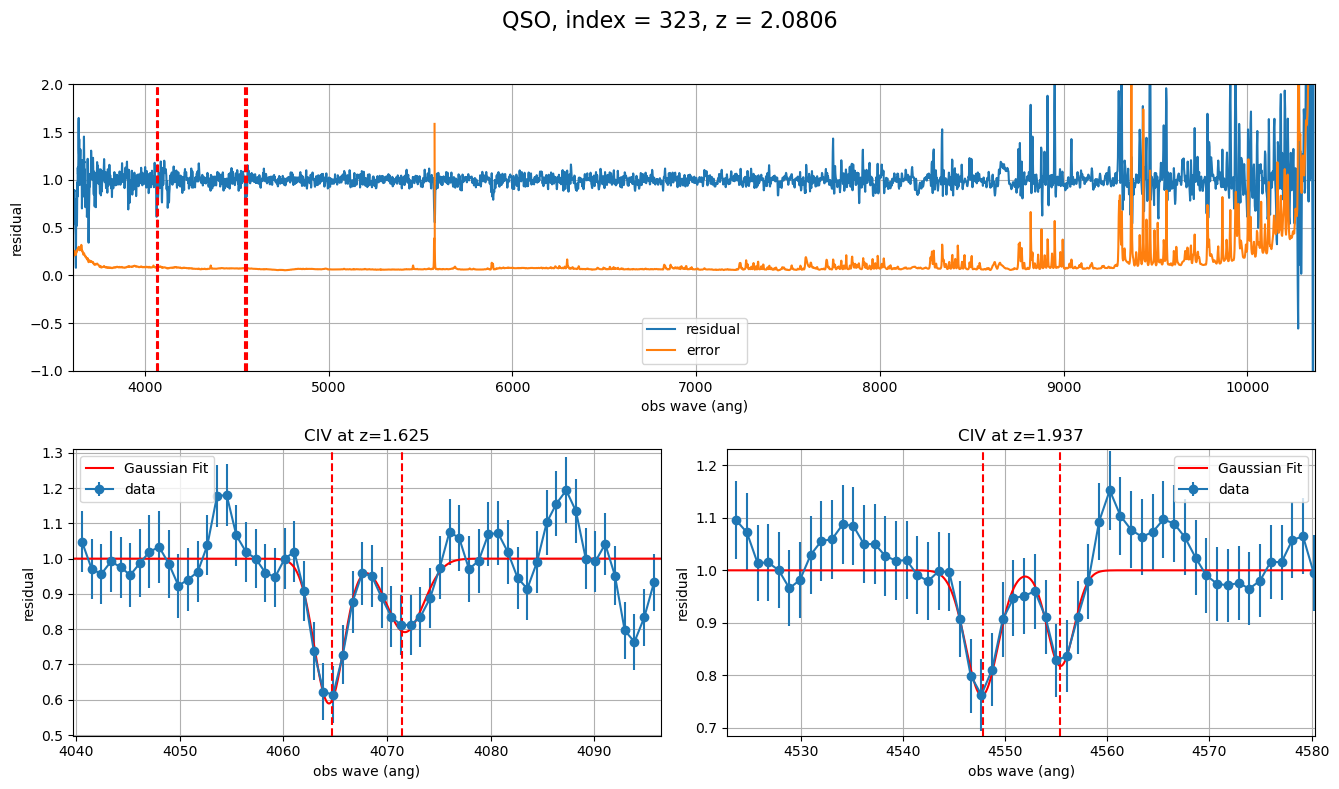

In [2]:
from qsoabsfind.utils import plot_absorber
from qsoabsfind.spec import QSOSpecRead

# select a random spectra from MgII_cat.fits

index = np.random.choice(abs_tab["INDEX_SPEC"].data)
spectra = QSOSpecRead(f'../data/qso_test.fits', index)

# select corresponding zabs table
zabs = abs_tab[abs_tab["INDEX_SPEC"].data==index]
plot_absorber(spectra, 'CIV', zabs, show_error=True, xlabel='obs wave (ang)', \
              ylabel='residual', title=f'QSO, index = {index}, z = {spectra.metadata["Z_QSO"]:.4f}', plot_filename=None)